<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [15]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [16]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Features and labels
X = mnist.data  # 784 features (28x28 pixel values)
y = mnist.target.astype(int)  # Labels are digits from 0 to 9

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (56000, 784)
Test set size: (14000, 784)


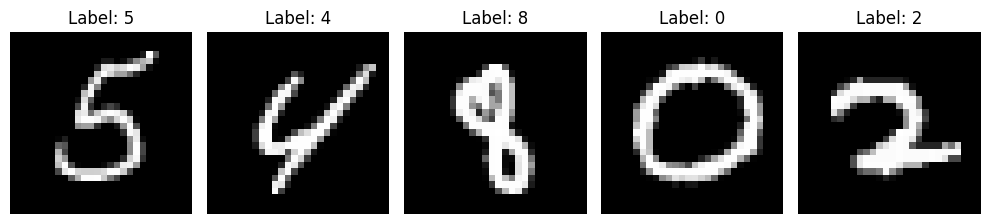

In [17]:
# Visualize the first 5 samples
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [18]:
# Standardize the features (scale pixel values to zero mean and unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of Principal Components:", pca.n_components_)
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))


Number of Principal Components: 330
Explained Variance Ratio: 0.9502986411242978


In [20]:
# Train a Random Forest classifier using PCA-transformed data
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = model.predict(X_test_pca)


In [21]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9367857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.98      0.98      0.98      1600
           2       0.91      0.94      0.93      1380
           3       0.90      0.93      0.92      1433
           4       0.93      0.95      0.94      1295
           5       0.94      0.90      0.92      1273
           6       0.96      0.96      0.96      1396
           7       0.94      0.94      0.94      1503
           8       0.92      0.89      0.91      1357
           9       0.92      0.91      0.91      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



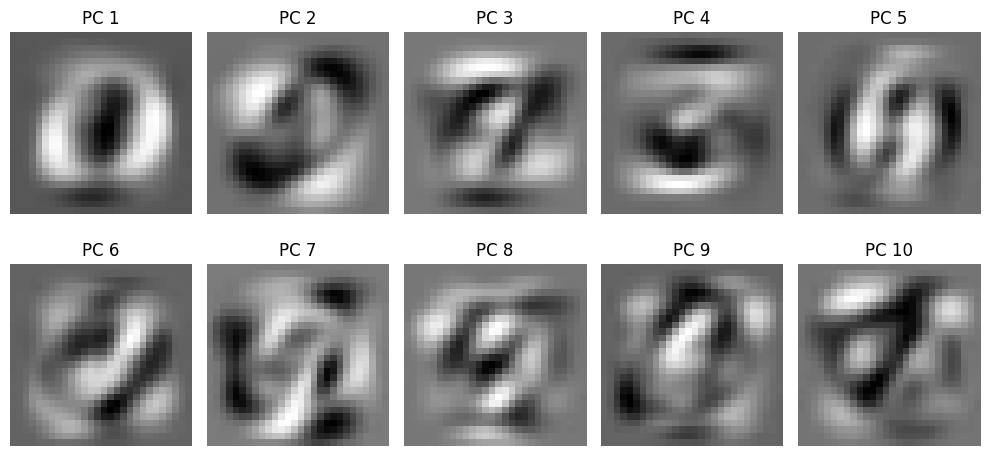

In [22]:
# Visualize the first 10 principal components
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()
